In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("./sp500_companies.csv")
data.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,169.80,2773581037568,1.202330e+11,0.288,Cupertino,CA,United States,154000.0,"Apple Inc. designs, manufactures, and markets ...",0.065258
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,302.65,2272290144256,8.574500e+10,0.220,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.053464
2,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2725.81,1807269232640,8.519700e+10,0.410,Mountain View,CA,United States,150028.0,Larry Page and Sergey Brin founded Google in S...,0.042522
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2719.96,1807269232640,8.519700e+10,0.410,Mountain View,CA,United States,150028.0,Larry Page and Sergey Brin founded Google in S...,0.042522
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,3178.35,1611893833728,6.040400e+10,0.153,Seattle,WA,United States,1468000.0,"Amazon.com, Inc. engages in the retail sale of...",0.037925


In [26]:
data.isna().sum()/len(data)*100


In [54]:
data[['Ebitda','Revenuegrowth','State','Fulltimeemployees']]
# null time Nan

,Ebitda,Revenuegrowth,State,Fulltimeemployees
0,1.202330e+11,0.288,CA,154000.0
1,8.574500e+10,0.220,WA,181000.0
2,8.519700e+10,0.410,CA,150028.0
3,8.519700e+10,0.410,CA,150028.0
4,6.040400e+10,0.153,WA,1468000.0
...,...,...,...,...
497,1.317700e+09,0.338,PA,18321.0
498,1.034000e+09,0.055,NY,43000.0
499,1.096200e+09,0.101,NY,20000.0
500,-3.750000e+08,1.786,WA,18819.0


In [43]:
columns = ['Fulltimeemployees','Ebitda','Revenuegrowth']
for c in columns:
    data[c] = data[c].fillna(data[c].median())

In [42]:
data.isna().sum()/len(data)

Exchange               0.000000
Symbol                 0.000000
Shortname              0.000000
Longname               0.000000
Sector                 0.000000
Industry               0.000000
Currentprice           0.000000
Marketcap              0.000000
Ebitda                 0.000000
Revenuegrowth          0.000000
City                   0.000000
State                  0.039841
Country                0.000000
Fulltimeemployees      0.000000
Longbusinesssummary    0.000000
Weight                 0.000000
dtype: float64

In [64]:
columns = ['State','Exchange','Symbol','Shortname','Longname','Sector','Industry','City','Country','Longbusinesssummary']
drop_columns = ['State','Symbol','Shortname','Longname','Industry','City','Longbusinesssummary']
# remain Exchange, Sector, Country
for c in columns:
    print(c,data[c].nunique(),)
    
data_drop = data.drop(drop_columns ,axis =1)
data_drop  

State 38
Exchange 4
Symbol 502
Shortname 498
Longname 497
Sector 11
Industry 114
City 235
Country 7
Longbusinesssummary 497


,Exchange,Sector,Currentprice,Marketcap,Ebitda,Revenuegrowth,Country,Fulltimeemployees,Weight
0,NMS,Technology,169.80,2773581037568,1.202330e+11,0.288,United States,154000.0,0.065258
1,NMS,Technology,302.65,2272290144256,8.574500e+10,0.220,United States,181000.0,0.053464
2,NMS,Communication Services,2725.81,1807269232640,8.519700e+10,0.410,United States,150028.0,0.042522
3,NMS,Communication Services,2719.96,1807269232640,8.519700e+10,0.410,United States,150028.0,0.042522
4,NMS,Consumer Cyclical,3178.35,1611893833728,6.040400e+10,0.153,United States,1468000.0,0.037925
...,...,...,...,...,...,...,...,...,...
497,NMS,Consumer Cyclical,42.55,7212820480,1.317700e+09,0.338,United States,18321.0,0.000170
498,NYQ,Industrials,19.92,7149826048,1.034000e+09,0.055,United States,43000.0,0.000168
499,NYQ,Consumer Cyclical,100.86,7057940992,1.096200e+09,0.101,United States,20000.0,0.000166
500,NYQ,Industrials,54.98,6889598976,-3.750000e+08,1.786,United States,18819.0,0.000162


In [131]:
data_drop.dtypes
obj_type = ['Exchange','Sector','Country']
for t in obj_type:
    print(t, data[t].nunique())
print(data[obj_type])

for a in obj_type:
    print(data_drop[a].unique())


Exchange 4
Sector 11
Country 7
    Exchange                  Sector        Country
0        NMS              Technology  United States
1        NMS              Technology  United States
2        NMS  Communication Services  United States
3        NMS  Communication Services  United States
4        NMS       Consumer Cyclical  United States
..       ...                     ...            ...
497      NMS       Consumer Cyclical  United States
498      NYQ             Industrials  United States
499      NYQ       Consumer Cyclical  United States
500      NYQ             Industrials  United States
501      NYQ       Consumer Cyclical  United States

[502 rows x 3 columns]
['NMS' 'NYQ' 'NGM' 'BTS']
['Technology' 'Communication Services' 'Consumer Cyclical'
 'Financial Services' 'Healthcare' 'Consumer Defensive' 'Energy'
 'Industrials' 'Basic Materials' 'Utilities' 'Real Estate']
['United States' 'Ireland' 'United Kingdom' 'Switzerland' 'Netherlands'
 'Israel' 'Bermuda']


In [154]:
data_onehot.groupby(['Sector'])['Sector'].count().sort_values(ascending=False)/len(data_onehot)*100

Sector
9     14.541833
7     14.342629
5     13.545817
6     12.948207
2     12.549801
3      6.972112
8      5.776892
10     5.577689
1      5.378486
0      4.183267
4      4.183267
Name: Sector, dtype: float64

In [157]:
from sklearn.preprocessing import LabelEncoder
data_drop['Country'] = LabelEncoder().fit_transform(data_drop['Country'])
# data_drop[data_drop['Country'] == 1]
data_drop['Sector'] = LabelEncoder().fit_transform(data_drop['Sector'])
data_prepro = pd.get_dummies(data_drop, columns=['Exchange'])

In [158]:
data_prepro

,Sector,Currentprice,Marketcap,Ebitda,Revenuegrowth,Country,Fulltimeemployees,Weight,Exchange_BTS,Exchange_NGM,Exchange_NMS,Exchange_NYQ
0,9,169.80,2773581037568,1.202330e+11,0.288,6,154000.0,0.065258,0,0,1,0
1,9,302.65,2272290144256,8.574500e+10,0.220,6,181000.0,0.053464,0,0,1,0
2,1,2725.81,1807269232640,8.519700e+10,0.410,6,150028.0,0.042522,0,0,1,0
3,1,2719.96,1807269232640,8.519700e+10,0.410,6,150028.0,0.042522,0,0,1,0
4,2,3178.35,1611893833728,6.040400e+10,0.153,6,1468000.0,0.037925,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
497,2,42.55,7212820480,1.317700e+09,0.338,6,18321.0,0.000170,0,0,1,0
498,7,19.92,7149826048,1.034000e+09,0.055,6,43000.0,0.000168,0,0,0,1
499,2,100.86,7057940992,1.096200e+09,0.101,6,20000.0,0.000166,0,0,0,1
500,7,54.98,6889598976,-3.750000e+08,1.786,6,18819.0,0.000162,0,0,0,1


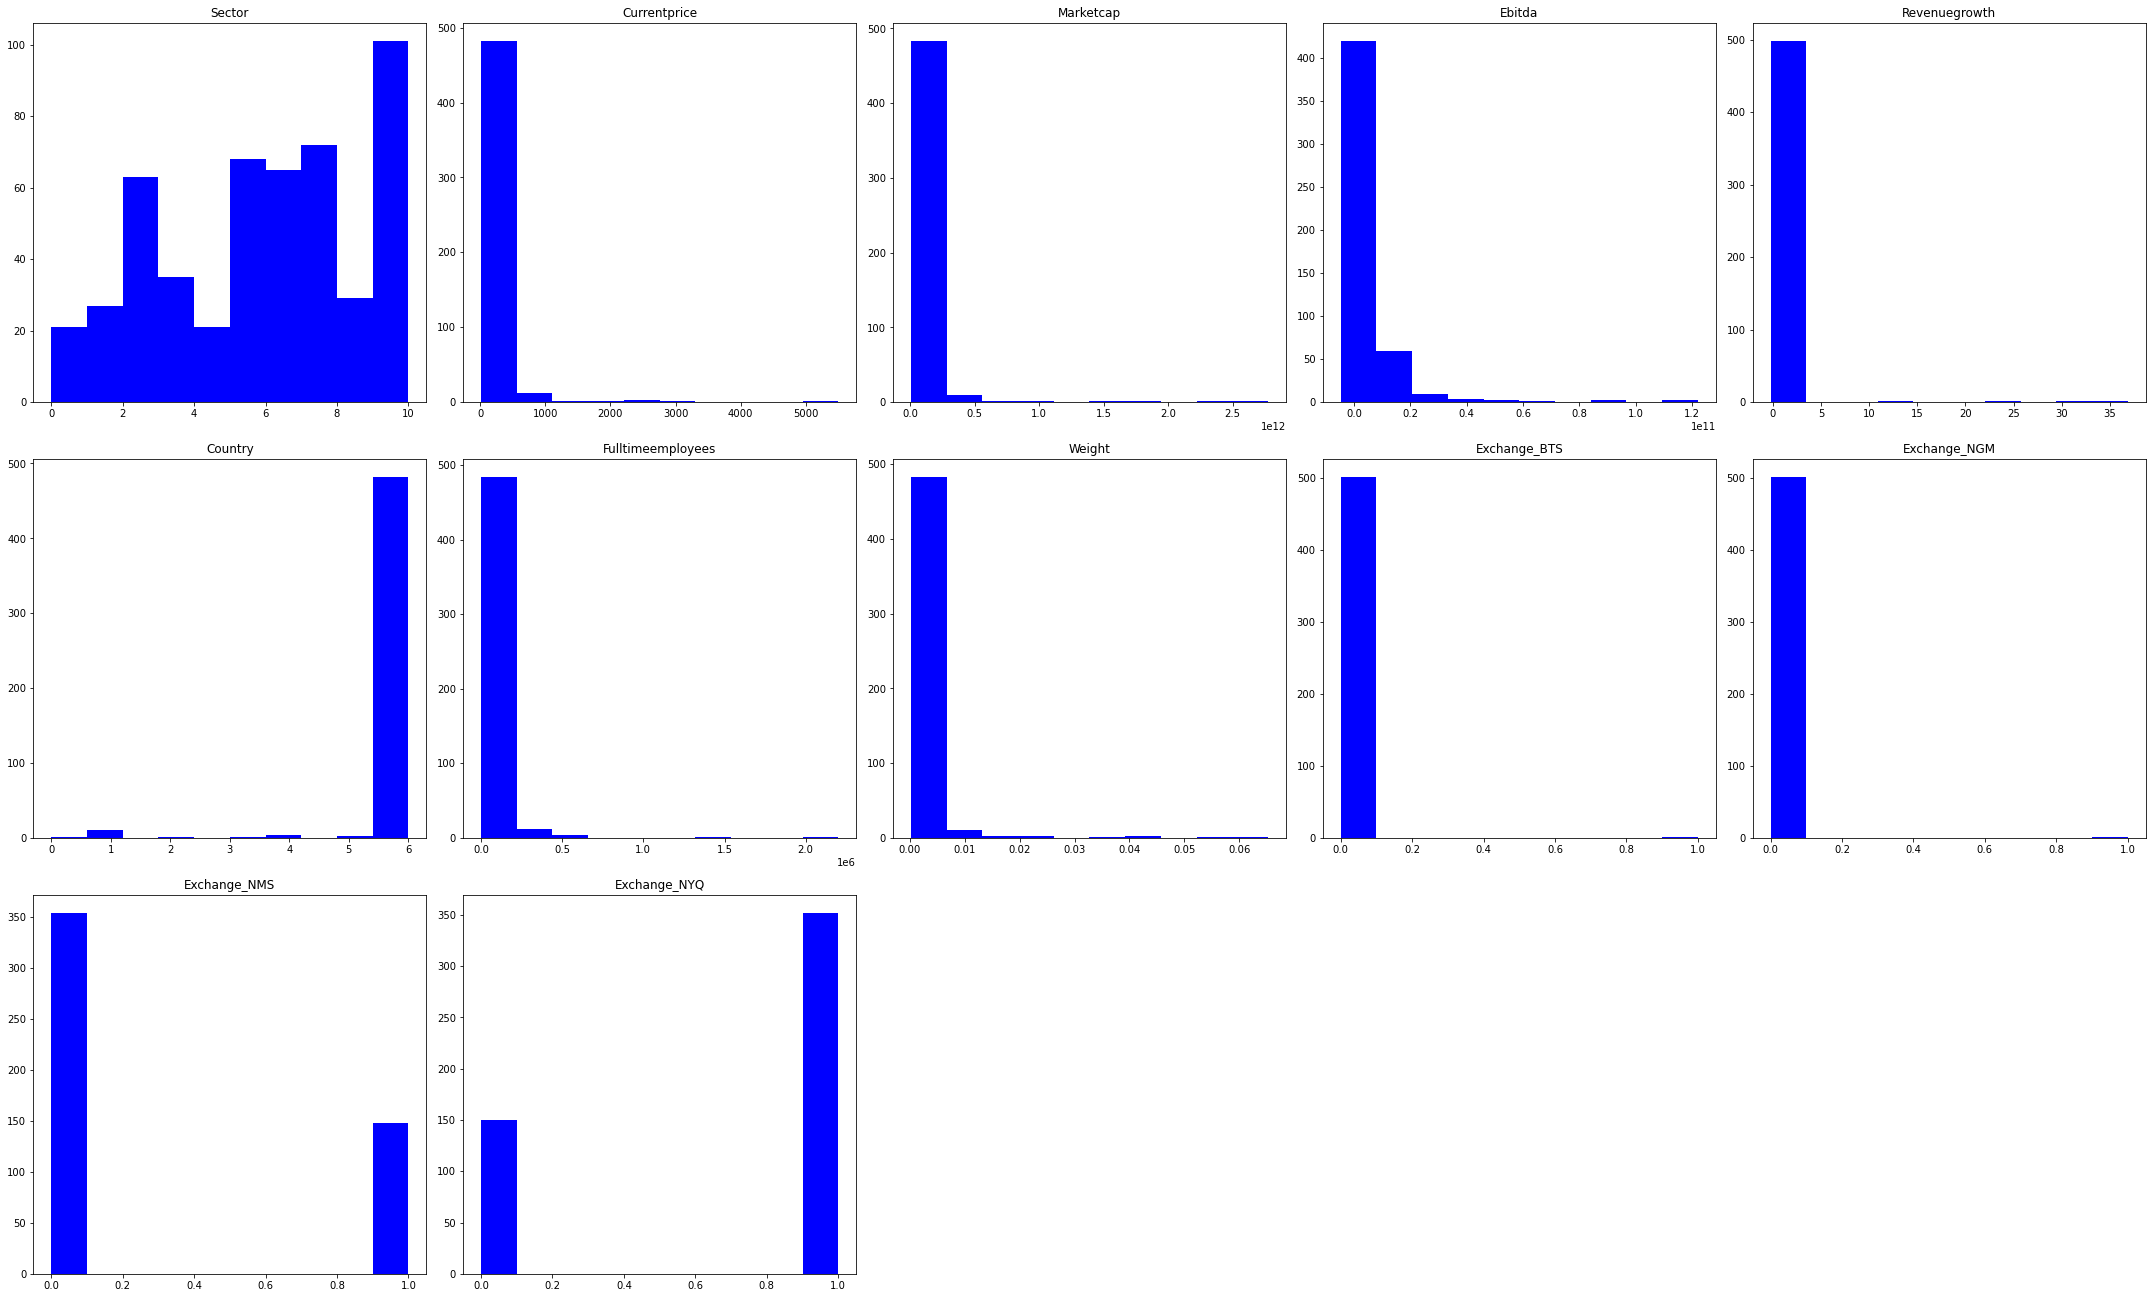

In [159]:
plt.figure(figsize = (30,30))
for i, col in enumerate(data_prepro.columns.to_list()):
    plt.subplot(5,5,i+1)
    plt.hist(data_prepro[col], label = col, color='blue')
    plt.title(col)
    plt.tight_layout()

<Figure size 720x720 with 0 Axes>

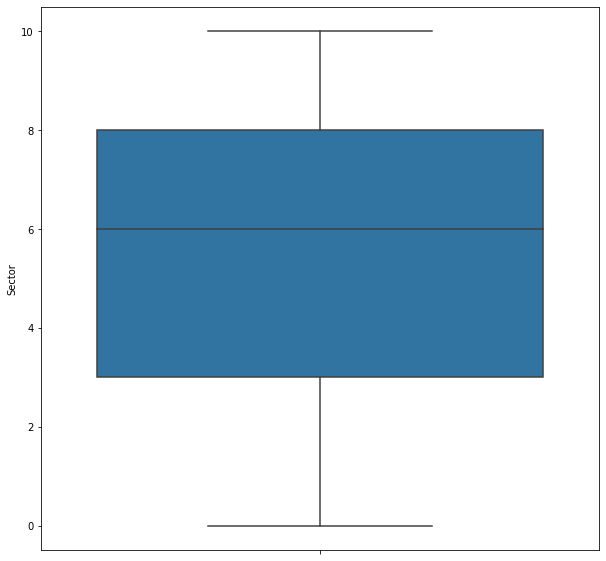

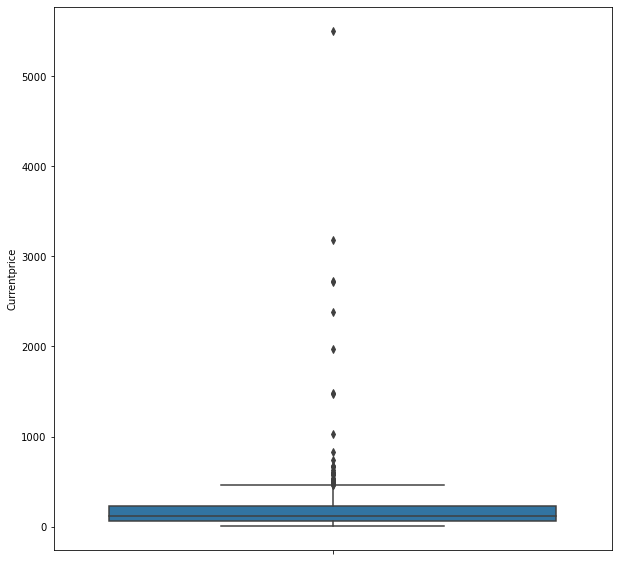

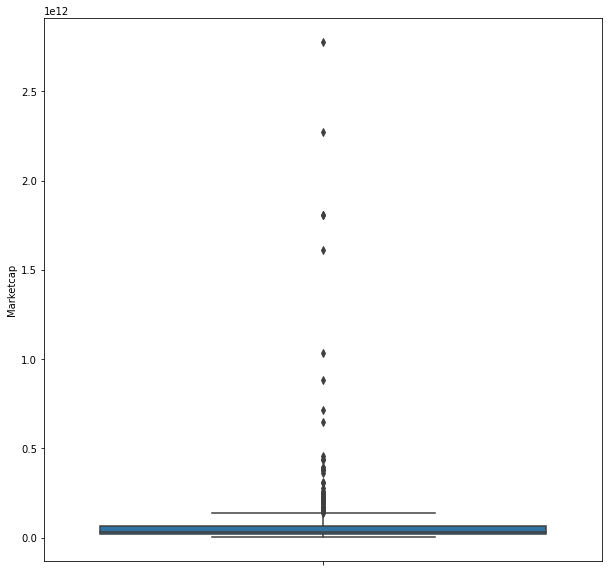

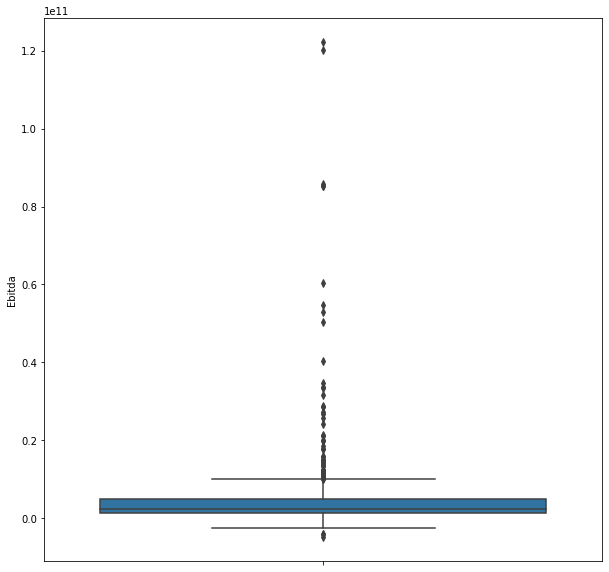

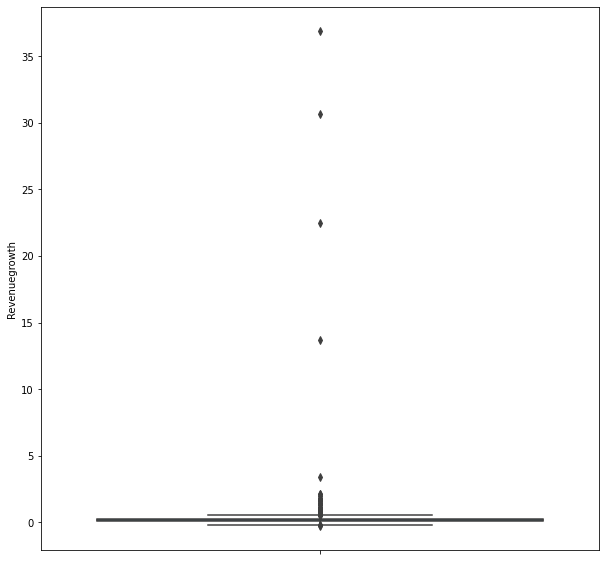

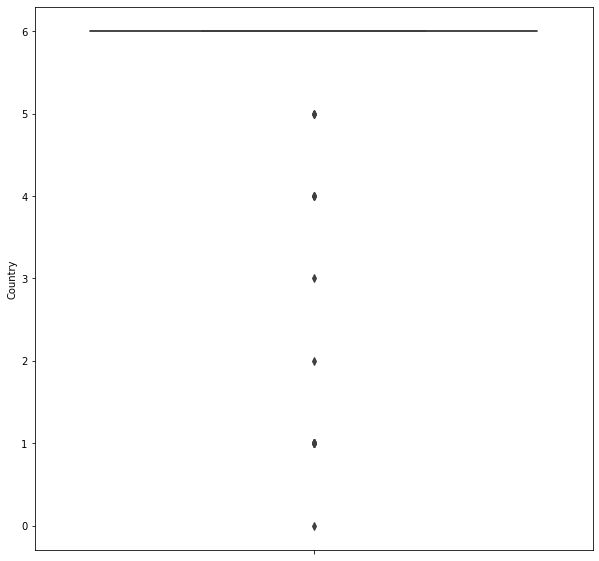

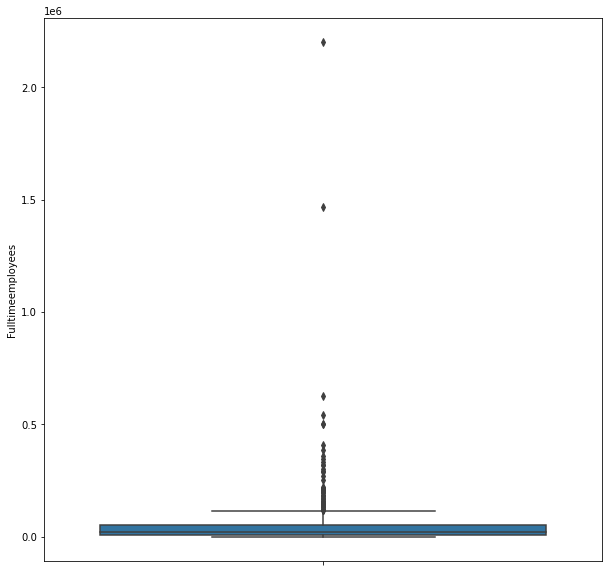

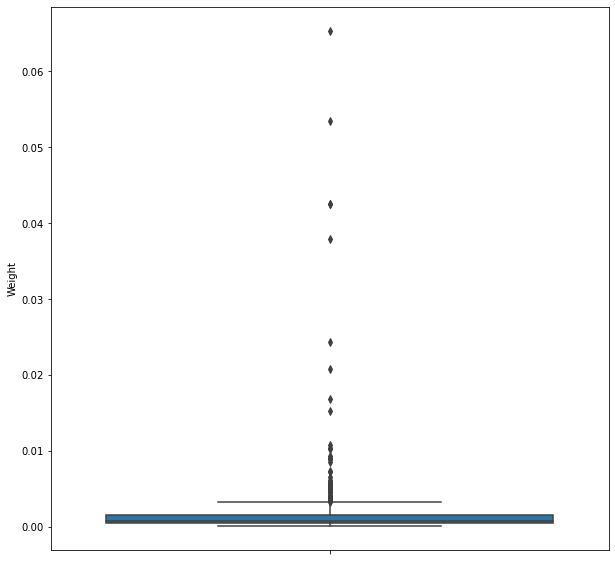

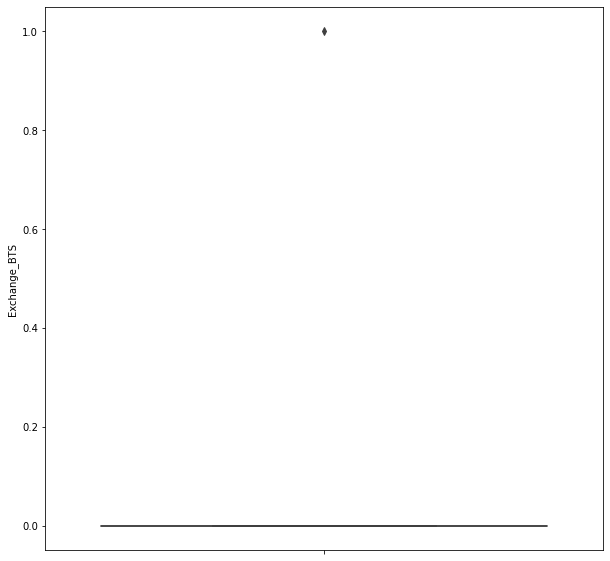

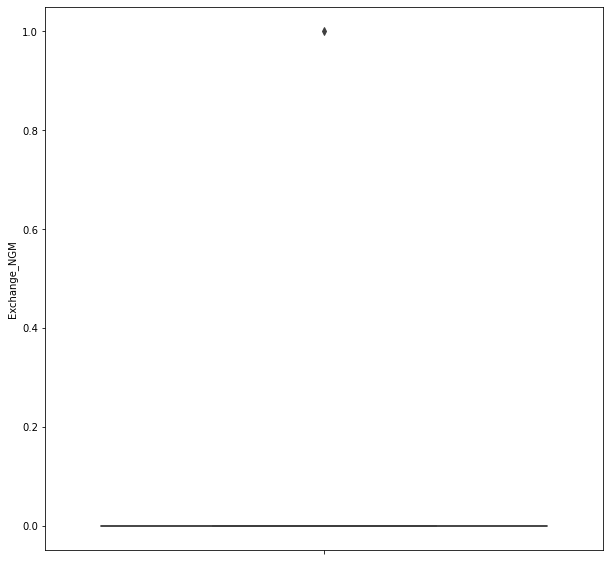

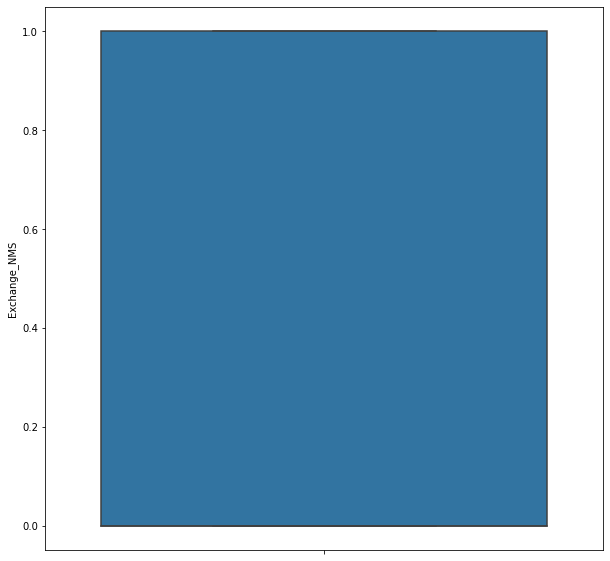

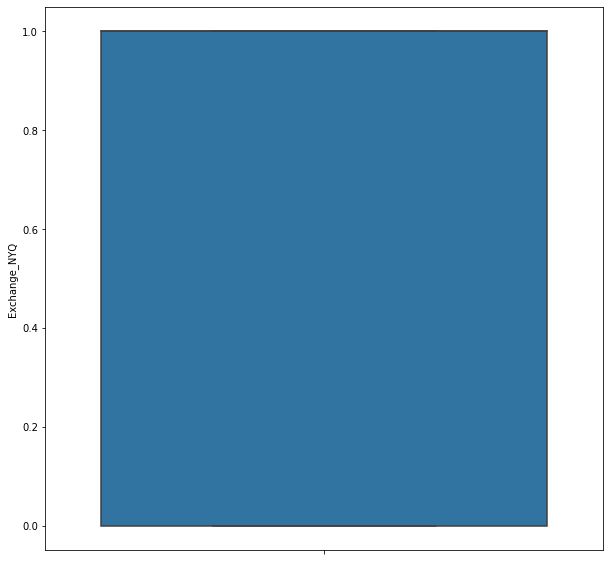

In [163]:
## box plot은 통계를 잘 몰라서 뭔지 모르겠네...

plt.figure(figsize=(10,10))
# sns.boxplot(data = data_prepro, y = 'Sector')

for col in data_prepro.columns.to_list():
    plt.figure(figsize=(10,10))
    sns.boxplot(data = data_prepro, y = col)

<AxesSubplot:>

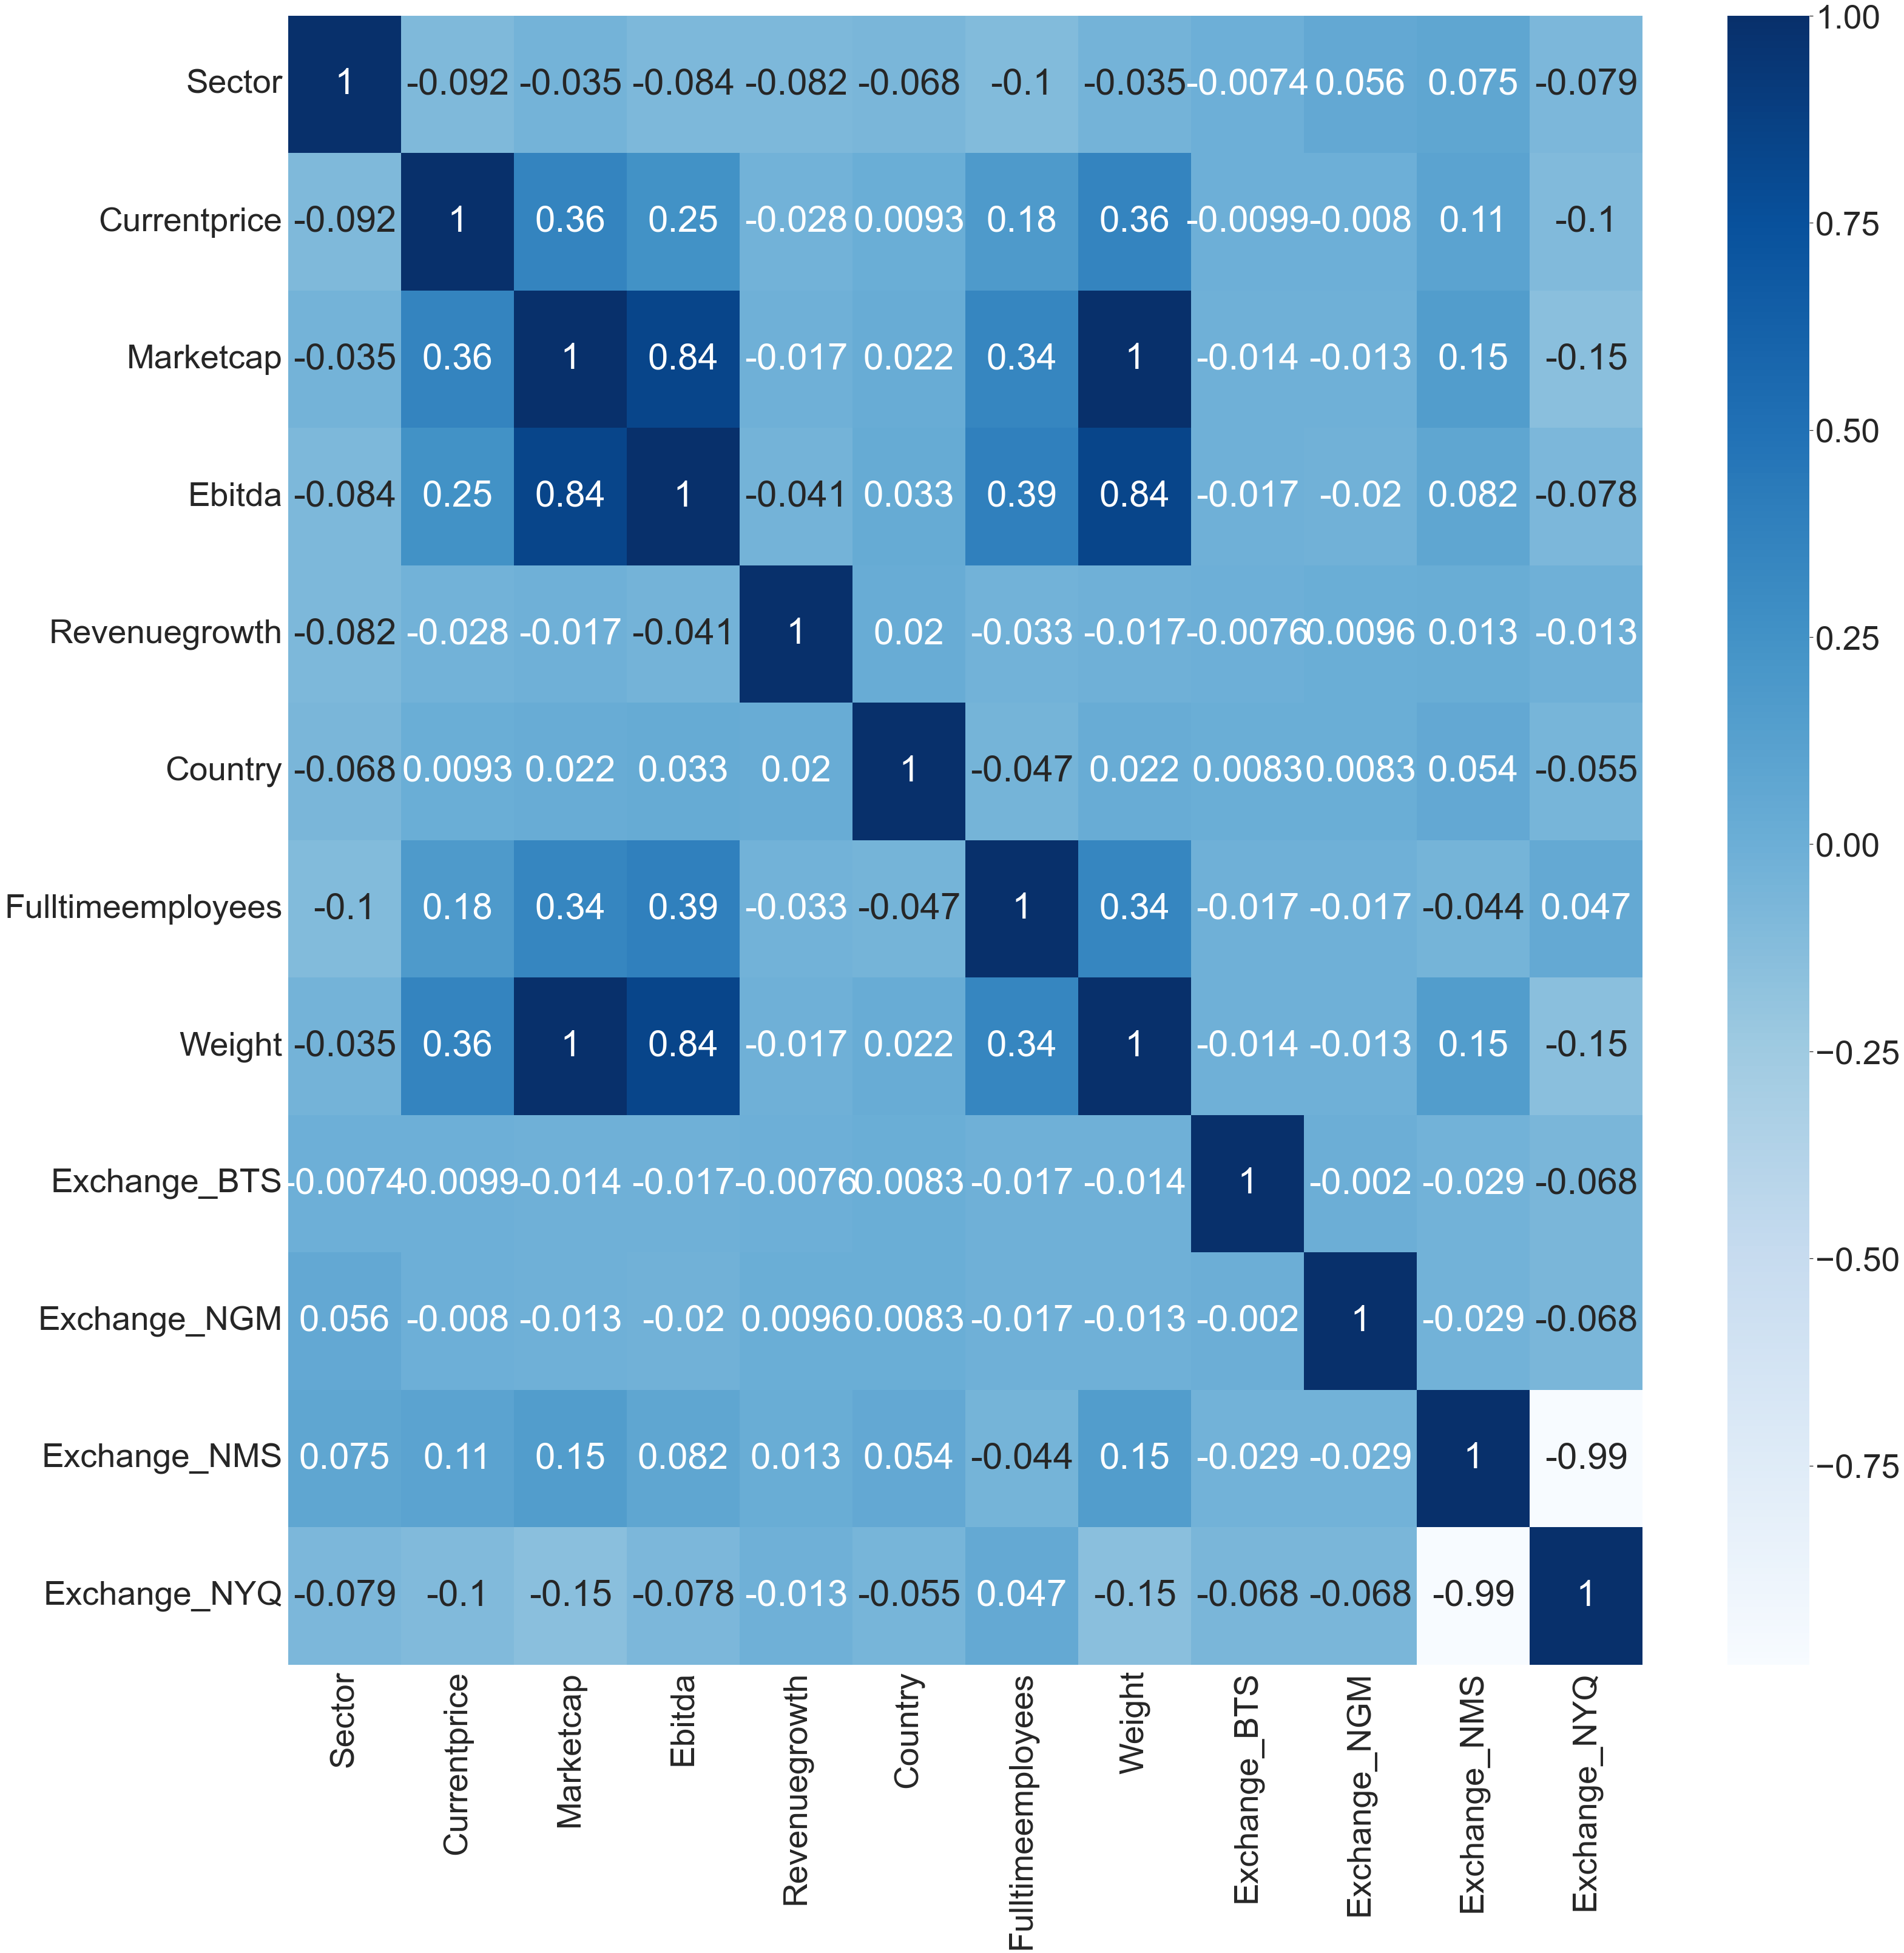

In [171]:
plt.figure(figsize = (50,50))
sns.set(font_scale=5) 
sns.heatmap(data_prepro.corr(), annot = True, cmap = "Blues")